In [49]:
using LinearAlgebra, Distributions
using Plots 

In [50]:
B(n,m,β)=Bidiagonal([rand(Chi(i*β)) for i=n:-1:(n-m+1)],[rand(Chi(i*β)) for i=m-1:-1:1],:L)

B (generic function with 1 method)

## Forrester(2013) ：β-spiked Wishart ensembles
### 論文タイトル：Probability densities and distributions for spiked and general variance Wishart β-ensembles 

<img src="forrester_model.png" width=70%>

In [52]:
# example
β=1;
n=8;
m=4;
X=B(n,m,β)
X=Array(X)
X[1:1]=(√4)*X[1:1] #b=2 by Forrester
X

4×4 Array{Float64,2}:
 4.05737  0.0      0.0        0.0
 1.05153  2.79533  0.0        0.0
 0.0      1.7217   1.97936    0.0
 0.0      0.0      0.0563845  2.6535

In [34]:
#10^6回：約140秒(特異値分解)
#10^6回：約70秒(固有値分解)
list=[]
size=10^5;
β=1;
n=30;
m=20;
b=4^3;
@time for i=1:size
    X=B(n,m,β)
    X=Array(X)
    X[1:1]=(√b)*X[1:1]
    W=Transpose(X)*X
    F=maximum(eigen(W).values)
    append!(list,F)
end

  7.388251 seconds (2.60 M allocations: 2.388 GiB, 8.37% gc time)


In [6]:
using StatsPlots

* 強スパイクモデル(最大固有値の寄与率が1に近い)場合はok
* ex) b=5, m=20, n=30 最大固有値の寄与率：4^3/(4^3+19)=0.7710843373493976

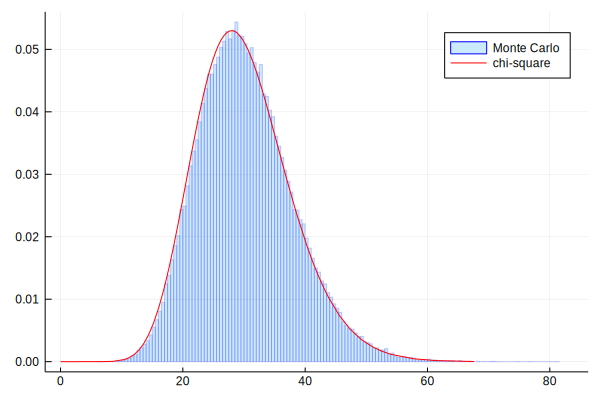

In [35]:
d=Chisq(n*β)
histogram(list/b,norm=true,alpha=0.2,linecolor =:blue,lab="Monte Carlo")
plot!(d,linecolor=:red,lab="chi-square")

In [36]:
for i in [0.05,0.5,0.95,0.99]
println(string(Int(i*100),"パーセント点：",quantile(Chisq(n*β),i),", ",quantile(list/b,i)))
end

5パーセント点：18.49266098195347, 18.77129853796516
50パーセント点：29.33603151666159, 29.638985104800824
95パーセント点：43.772971825742175, 44.10588632905548
99パーセント点：50.89218131151709, 51.29651403786081


* 弱スパイクモデル(最大固有値の寄与率が0に近い)場合はダメ
* Ishi et al.(2014)で似たような議論がされている(高次元)
* ex) b=4, m=20, n=30 最大固有値の寄与率：4/(4+19)=0.17391304347826086

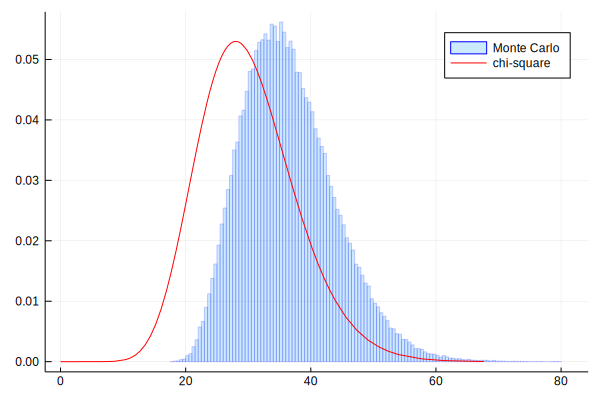

In [24]:
#size=10^5;β=1;n=30;m=20;b=5;のケース
d=Chisq(n*β)
histogram(list/b,norm=true,alpha=0.2,linecolor =:blue,lab="Monte Carlo")
plot!(d,linecolor=:red,lab="chi-square")

In [25]:
for i in [0.05,0.5,0.95,0.99]
println(string(Int(i*100),"パーセント点：",quantile(Chisq(n*β),i),", ",quantile(list/b,i)))
end

5パーセント点：18.49266098195347, 25.694810749470175
50パーセント点：29.33603151666159, 35.68682917119959
95パーセント点：43.772971825742175, 49.78832661840404
99パーセント点：50.89218131151709, 56.728017394028875


## MP則とスパイクモデル

In [40]:
n=600;
m=300;
b1=2;
X=B(n,m,β)
X=Array(X)
X[1:1]=(√b1)*X[1:1]

1-element Array{Float64,1}:
 34.066702165505866

In [47]:
# Marchenko-Pastur則(Quater circle Law)のパラメータの設定
ρ=m/n;
σ=1;
b=σ*(sqrt(ρ)+1)^2;
a=σ*(1-sqrt(ρ))^2;

  0.067131 seconds (13 allocations: 4.157 MiB, 57.84% gc time)


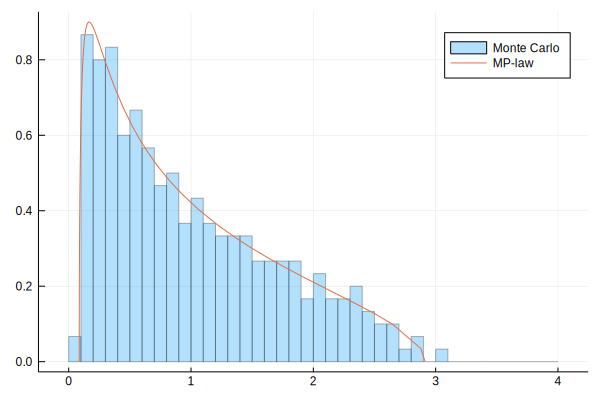

In [48]:
#スパイクモデルで検証
#n=600;m=300;b1=2;
@time list=svd(X).S
histogram(list.^2/(β*n),norm=true,alpha=0.3,bin=0:0.1:4,lab="Monte Carlo")
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b,lab="MP-law";)

In [49]:
# 飛び抜けた固有値の特定
println(string("soft edge：",b))
println(string("soft edgeを超えた固有値：",filter(x-> x>b,list.^2/(β*n))))

soft edge：2.914213562373095
soft edgeを超えた固有値：[3.0896713321685083]


  0.046576 seconds (13 allocations: 4.157 MiB)


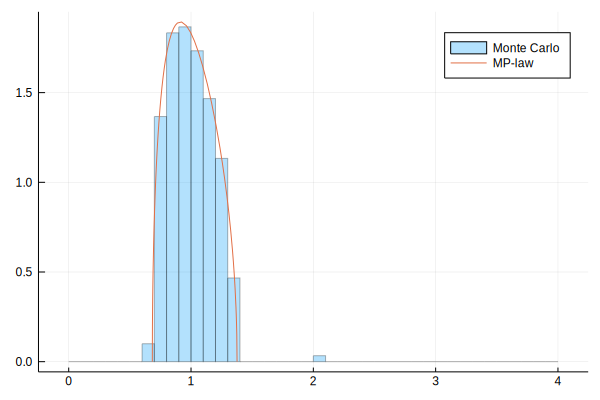

In [45]:
#スパイクモデルで検証
#n=10000;m=300;b1=2;
@time list=svd(X).S
histogram(list.^2/(β*n),norm=true,alpha=0.3,bin=0:0.1:4,lab="Monte Carlo")
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b,lab="MP-law";)

In [19]:
println(string("soft edge：",b))
println(string("soft edgeを超えた固有値：",filter(x-> x>b,list.^2/(β*n))))

soft edge：1.3764101615137754
soft edgeを超えた固有値：[2.0520769058895936]


- A Random Matrix Theory Approach to Denoise Single-Cell Data
- https://www.cell.com/patterns/pdfExtended/S2666-3899(20)30040-4